In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from VQLS import  estimateNorm
from LSSVM import predict, accuracy, linearKernel
import LSSVM
from VQLSSVM import VQLSSVM

In [2]:
shots = 10000
gamma = 0.01 # regularization parameter
testSize = 0.2
subsetSize = 7

In [3]:
vqlssvm = VQLSSVM(gamma, shots)

In [4]:
X, y = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=45
)
y = np.where(y == 0, -1, 1)
xTrain, xTest, yTrain, yTest = train_test_split(
    X, y, test_size=testSize, random_state=42
)
subsetIndices = np.random.choice(np.arange(xTrain.shape[0]), subsetSize, replace=False)
xSubset = np.array([xTrain[i] for i in subsetIndices])
ySubset = np.array([yTrain[i] for i in subsetIndices])

LS-SVM Matrix: [[ 0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.11225303e+02  9.00452066e+00 -3.52147329e+00
  -1.27245399e+00 -1.97940416e+00  8.56967286e-01  3.91481137e+00]
 [ 1.00000000e+00  9.00452066e+00  1.07565235e+02 -3.05246385e+00
  -2.95249727e-01 -1.81458838e+00 -2.97836388e-01  3.34580323e+00]
 [ 1.00000000e+00 -3.52147329e+00 -3.05246385e+00  1.01256212e+02
  -8.35594996e-02  7.71862495e-01  3.86776044e-01 -1.36484488e+00]
 [ 1.00000000e+00 -1.27245399e+00 -2.95249727e-01 -8.35594996e-02
   1.01682486e+02 -2.56485786e-01 -2.18625330e+00 -8.06104931e-03]
 [ 1.00000000e+00 -1.97940416e+00 -1.81458838e+00  7.71862495e-01
  -2.56485786e-01  1.00499357e+02  5.01953166e-01 -8.26518581e-01]
 [ 1.00000000e+00  8.56967286e-01 -2.97836388e-01  3.86776044e-01
  -2.18625330e+00  5.01953166e-01  1.02902670e+02 -2.92871053e-01]
 [ 1.00000000e+00  3.91481137e+00  3.34580323e+00 -1.3

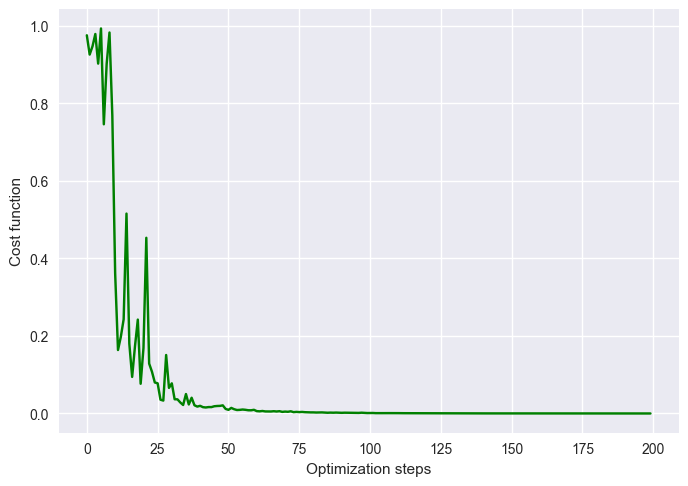

In [5]:
vqlssvm.train(xSubset, ySubset, quantumSimulation=False, verbose=True, iterations = 200)

vqlssvm.plotCost()

In [6]:
print(vqlssvm.predict(xTest))

[ 0.03169084+0.j -0.01743547+0.j -0.01915323+0.j -0.02616407+0.j
 -0.0683684 +0.j -0.05344212+0.j  0.00347084+0.j -0.03081689+0.j
 -0.03976436+0.j -0.14107383+0.j]


In [7]:
 print("Accuracy:",vqlssvm.accuracy(xTest, yTest))

Accuracy: 0.9


LS-SVM Matrix: [[ 0.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.11225303e+02  9.00452066e+00 -3.52147329e+00
  -1.27245399e+00 -1.97940416e+00  8.56967286e-01  3.91481137e+00]
 [ 1.00000000e+00  9.00452066e+00  1.07565235e+02 -3.05246385e+00
  -2.95249727e-01 -1.81458838e+00 -2.97836388e-01  3.34580323e+00]
 [ 1.00000000e+00 -3.52147329e+00 -3.05246385e+00  1.01256212e+02
  -8.35594996e-02  7.71862495e-01  3.86776044e-01 -1.36484488e+00]
 [ 1.00000000e+00 -1.27245399e+00 -2.95249727e-01 -8.35594996e-02
   1.01682486e+02 -2.56485786e-01 -2.18625330e+00 -8.06104931e-03]
 [ 1.00000000e+00 -1.97940416e+00 -1.81458838e+00  7.71862495e-01
  -2.56485786e-01  1.00499357e+02  5.01953166e-01 -8.26518581e-01]
 [ 1.00000000e+00  8.56967286e-01 -2.97836388e-01  3.86776044e-01
  -2.18625330e+00  5.01953166e-01  1.02902670e+02 -2.92871053e-01]
 [ 1.00000000e+00  3.91481137e+00  3.34580323e+00 -1.3

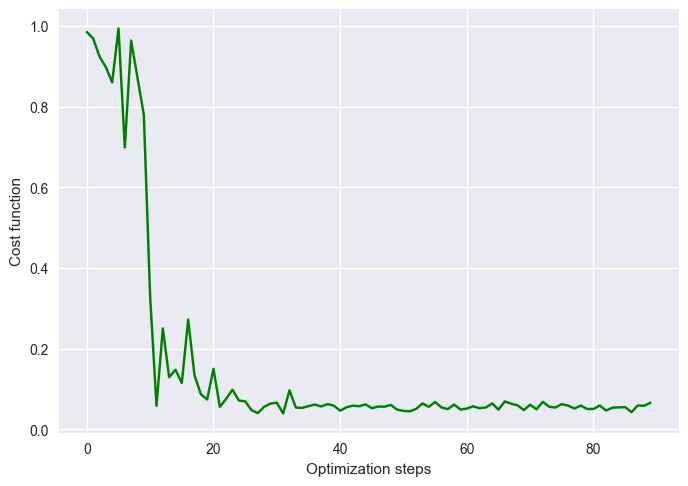

In [8]:
vqlssvm.train(xSubset, ySubset, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvm.plotCost()

In [9]:
print("Predictions: ", vqlssvm.predict(xTest))
print("Accuracy: ", vqlssvm.accuracy(xTest, yTest))

Predictions:  [-0.00116296+0.j -0.0120723 +0.j -0.03689783+0.j -0.05908715+0.j
 -0.05087437+0.j -0.04628874+0.j  0.00032956+0.j -0.0624567 +0.j
 -0.0749028 +0.j -0.08561624+0.j]
Accuracy:  0.8
